# Preparing the development of a music recommender system

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Cleaning

##### users.csv

**Task**: Import the *users.csv* file 

In [2]:
users = pd.read_csv('users.csv')
users

,uid;p;m1;m2;m3
0,33616;1;1136;;1250.6320492991067
1,32048;Yes;2011;;2294.355415100163
2,29095;Yes;1486;;1346.6327689420677
3,32106;No;131;;140.6399934371262
4,31885;Yes;929;;820.273300749299
...,...
507,37330;1;1614;;1454.5012250090704
508,27499;Yes;901;;816.8368658835913
509,29149;Yes;672;;703.5880637388863
510,30768;0;438;837.0;537.4476617394415


That did not work, we need to use a different delimiter. 

In [3]:
users = pd.read_csv('users.csv', delimiter=';')
users

,uid,p,m1,m2,m3
0,33616,1,1136,NaN,1250.632049
1,32048,Yes,2011,NaN,2294.355415
2,29095,Yes,1486,NaN,1346.632769
3,32106,No,131,NaN,140.639993
4,31885,Yes,929,NaN,820.273301
...,...,...,...,...,...
507,37330,1,1614,NaN,1454.501225
508,27499,Yes,901,NaN,816.836866
509,29149,Yes,672,NaN,703.588064
510,30768,0,438,837.0,537.447662


**Task**: Rename the columns according to the description in the exercise sheet into a more readible format.

In [4]:
users.rename(columns={
    'uid': 'UserId',
    'p': 'Premium',
    'm1': 'Minutes1',
    'm2': 'Minutes2',
    'm3': 'Minutes3' 
}, inplace=True)

users

,UserId,Premium,Minutes1,Minutes2,Minutes3
0,33616,1,1136,NaN,1250.632049
1,32048,Yes,2011,NaN,2294.355415
2,29095,Yes,1486,NaN,1346.632769
3,32106,No,131,NaN,140.639993
4,31885,Yes,929,NaN,820.273301
...,...,...,...,...,...
507,37330,1,1614,NaN,1454.501225
508,27499,Yes,901,NaN,816.836866
509,29149,Yes,672,NaN,703.588064
510,30768,0,438,837.0,537.447662


**Task**: Unify the labels for the *Premium* attribute.

In [5]:
users['Premium'] = users['Premium'].map({'0': False, 
                                         '1': True,
                                         'Yes': True,
                                         'No': False},)

users

,UserId,Premium,Minutes1,Minutes2,Minutes3
0,33616,True,1136,NaN,1250.632049
1,32048,True,2011,NaN,2294.355415
2,29095,True,1486,NaN,1346.632769
3,32106,False,131,NaN,140.639993
4,31885,True,929,NaN,820.273301
...,...,...,...,...,...
507,37330,True,1614,NaN,1454.501225
508,27499,True,901,NaN,816.836866
509,29149,True,672,NaN,703.588064
510,30768,False,438,837.0,537.447662


**Task**: Impute the missing values of the attribute *Minutes2* using the values of *Minutes1* and *Minutes3*.

Text(0.5, 1.0, 'Difference between the minutes listened before three months and last month')

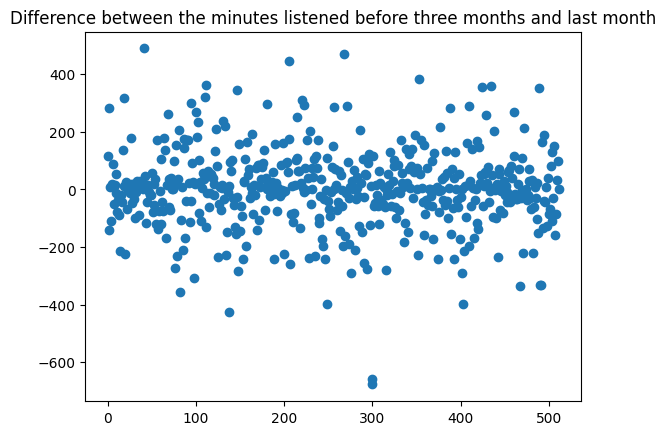

In [6]:
plt.plot(users['Minutes3'] - users['Minutes1'], 'o')
plt.title('Difference between the minutes listened before three months and last month')

We can see that the listening times vary quite stable around zero. Hence, we assume that the listening patterns are consistent between shorter time periods, and thus, we can impute the missing data by taking the average of the other two columns.

In [7]:
# This does NOT work as we would overwrite non-missing values:
# users['Minutes2'] = (users['Minutes1'] + users['Minutes3'])/2
# users

users['Minutes2'] = users['Minutes2'].fillna((users['Minutes1'] + users['Minutes3'])/2)
users

,UserId,Premium,Minutes1,Minutes2,Minutes3
0,33616,True,1136,1193.316025,1250.632049
1,32048,True,2011,2152.677708,2294.355415
2,29095,True,1486,1416.316384,1346.632769
3,32106,False,131,135.819997,140.639993
4,31885,True,929,874.636650,820.273301
...,...,...,...,...,...
507,37330,True,1614,1534.250613,1454.501225
508,27499,True,901,858.918433,816.836866
509,29149,True,672,687.794032,703.588064
510,30768,False,438,837.000000,537.447662


##### user_behavior.csv

**Task**: Read the *user_behavior.csv* file.

In [8]:
user_behavior = pd.read_csv("user_behavior.csv", delimiter=';')
user_behavior

,user_id,song_id,num_clicks,ml,g,f,mod,artists
0,29158,55060,64,251.982460,Rock,1,2023-09-22,662
1,33692,5080,63,260.001056,Pop,0,2023-08-14,4937
2,31198,25839,24,105.355020,Hip-Hop,1,2023-06-24,6289
3,33302,87341,36,142.085267,Electronic,0,2023-07-22,1356
4,34592,47110,74,301.314994,Pop,0,2023-04-28,8373
...,...,...,...,...,...,...,...,...
9995,29529,61631,59,233.774341,Hip-Hop,0,2023-07-23,4102
9996,31337,36418,55,238.032765,Rock,1,2023-06-15,3619
9997,27988,46895,88,351.861677,Pop,0,2023-05-12,6043
9998,33334,56043,11,43.287063,Rock,0,2023-06-10,7299


**Task**: Rename the columns according to the description in the exercise sheet.

In [9]:
user_behavior.rename(columns={
    'user_id': 'UserId',
    'song_id': 'SongId',
    'num_clicks': 'NumClicks',
    'ml': 'MinutesListened',
    'g': 'Genre',
    'f': 'Favorite',
    'mod': 'ModifiedAt', 
    'artists': 'Artists'
}, inplace=True)

user_behavior

,UserId,SongId,NumClicks,MinutesListened,Genre,Favorite,ModifiedAt,Artists
0,29158,55060,64,251.982460,Rock,1,2023-09-22,662
1,33692,5080,63,260.001056,Pop,0,2023-08-14,4937
2,31198,25839,24,105.355020,Hip-Hop,1,2023-06-24,6289
3,33302,87341,36,142.085267,Electronic,0,2023-07-22,1356
4,34592,47110,74,301.314994,Pop,0,2023-04-28,8373
...,...,...,...,...,...,...,...,...
9995,29529,61631,59,233.774341,Hip-Hop,0,2023-07-23,4102
9996,31337,36418,55,238.032765,Rock,1,2023-06-15,3619
9997,27988,46895,88,351.861677,Pop,0,2023-05-12,6043
9998,33334,56043,11,43.287063,Rock,0,2023-06-10,7299


**Task:** Fix the data types of the attributes *Genre* (categorical) and *Favorite* (binary, categorical).

In [10]:
user_behavior['Genre'] = user_behavior['Genre'].astype('category')
user_behavior['Favorite'] = user_behavior['Favorite'].astype('bool')

In [11]:
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   UserId           10000 non-null  int64   
 1   SongId           10000 non-null  int64   
 2   NumClicks        10000 non-null  int64   
 3   MinutesListened  10000 non-null  float64 
 4   Genre            10000 non-null  category
 5   Favorite         10000 non-null  bool    
 6   ModifiedAt       10000 non-null  object  
 7   Artists          10000 non-null  int64   
dtypes: bool(1), category(1), float64(1), int64(4), object(1)
memory usage: 489.1+ KB


**Task:** Some genres have more songs than others. Adjust the data set such that it includes only the four largest genres and the genre "Other" that summarizes all remaining genres.

First, we are going to plot the number of songs per genre.

Text(0.5, 1.0, 'Number of songs per genre')

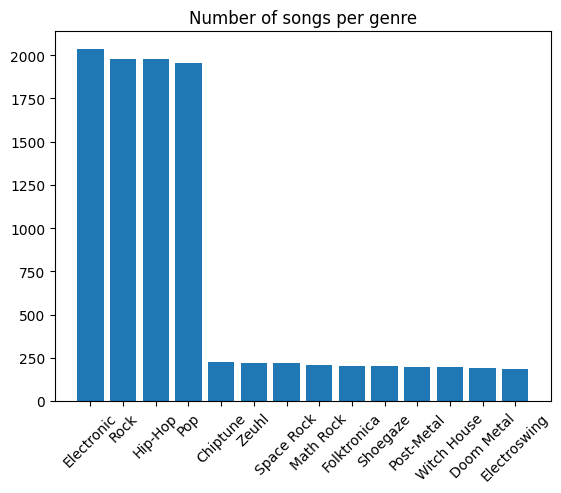

In [12]:
genre_counts = user_behavior['Genre'].value_counts()

plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=45)
plt.title('Number of songs per genre')

We can see that there are four genres that are streamed more often than the genres. We might want to consider to aggregate the remaining genres into a single group.

In [13]:
user_behavior['Genre'] = user_behavior['Genre'].map({
    'Electronic': 'Electronic',
    'Rock': 'Rock',
    'Hip-Hop': 'Hip-Hop',
    'Pop': 'Pop'
}).fillna('Other').astype('category')

Let's plot the updated genres again.

Text(0.5, 1.0, 'Number of songs per genre')

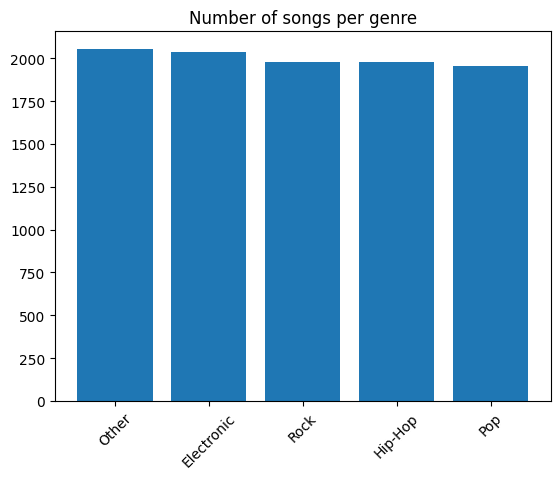

In [14]:
genre_counts = user_behavior['Genre'].value_counts()

plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=45)
plt.title('Number of songs per genre')

**Task:** Create for a new column for the weekday, year, month, and day of each date names *ModifiedAt*.

In [15]:
user_behavior['ModifiedAt'] = user_behavior['ModifiedAt'].astype('datetime64[ns]')
user_behavior['Weekday'] = user_behavior['ModifiedAt'].dt.day_name()
user_behavior['Year'] = user_behavior['ModifiedAt'].dt.year
user_behavior['Month'] = user_behavior['ModifiedAt'].dt.month   
user_behavior['Day'] = user_behavior['ModifiedAt'].dt.day

user_behavior

,UserId,SongId,NumClicks,MinutesListened,Genre,Favorite,ModifiedAt,Artists,Weekday,Year,Month,Day
0,29158,55060,64,251.982460,Rock,True,2023-09-22,662,Friday,2023,9,22
1,33692,5080,63,260.001056,Pop,False,2023-08-14,4937,Monday,2023,8,14
2,31198,25839,24,105.355020,Hip-Hop,True,2023-06-24,6289,Saturday,2023,6,24
3,33302,87341,36,142.085267,Electronic,False,2023-07-22,1356,Saturday,2023,7,22
4,34592,47110,74,301.314994,Pop,False,2023-04-28,8373,Friday,2023,4,28
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29529,61631,59,233.774341,Hip-Hop,False,2023-07-23,4102,Sunday,2023,7,23
9996,31337,36418,55,238.032765,Rock,True,2023-06-15,3619,Thursday,2023,6,15
9997,27988,46895,88,351.861677,Pop,False,2023-05-12,6043,Friday,2023,5,12
9998,33334,56043,11,43.287063,Rock,False,2023-06-10,7299,Saturday,2023,6,10


#### artists.csv

**Task**: Read the *artists.csv* file and re-name the columns according to the exercise sheet.

In [16]:
artists = pd.read_csv("artists.csv", sep=';')

artists.rename(columns={
    'artist_id': "ArtistId",
    'genre': "Genre",
    'featured': "Featured",
    'monthly_listeners': "MonthListeners"
}, inplace=True)

artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ArtistId        899 non-null    int64 
 1   Genre           899 non-null    object
 2   Featured        899 non-null    int64 
 3   MonthListeners  899 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 28.2+ KB


**Task:** Convert the attributes *Genre* and *Featured* to categorical variables.

In [17]:
artists["Genre"] = artists["Genre"].astype("category")
artists["Featured"] = artists["Featured"].astype("category")

In [18]:
artists

,ArtistId,Genre,Featured,MonthListeners
0,8497,Error,0,529178
1,3331,Error,0,1319507
2,7097,Rock,0,739339
3,1352,Error,0,127536
4,457,Error,0,387548
...,...,...,...,...
894,1567,Rap,0,650037
895,2143,Rap,0,306317
896,8260,Error,0,1185810
897,2524,Classic,0,276064


In [19]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ArtistId        899 non-null    int64   
 1   Genre           899 non-null    category
 2   Featured        899 non-null    category
 3   MonthListeners  899 non-null    int64   
dtypes: category(2), int64(2)
memory usage: 16.3 KB


### Data aggregation

**Task:** Merge the *users* and *user_behavior* tables together. Create a view in which you determine how many minutes a user listens to songs on average. Additionally, what is the highest number of clicks a user had on a song?

In [20]:
users_with_behavior = users.merge(user_behavior)
users_with_behavior

,UserId,Premium,Minutes1,Minutes2,Minutes3,SongId,NumClicks,MinutesListened,Genre,Favorite,ModifiedAt,Artists,Weekday,Year,Month,Day
0,33616,True,1136,1193.316025,1250.632049,49432,75,287.101132,Other,False,2023-08-09,3742,Wednesday,2023,8,9
1,33616,True,1136,1193.316025,1250.632049,27893,91,331.458582,Hip-Hop,False,2023-04-11,5193,Tuesday,2023,4,11
2,33616,True,1136,1193.316025,1250.632049,82964,65,243.904879,Electronic,True,2023-10-21,6897,Saturday,2023,10,21
3,33616,True,1136,1193.316025,1250.632049,3891,94,391.607028,Other,True,2023-02-01,923,Wednesday,2023,2,1
4,33616,True,1136,1193.316025,1250.632049,9766,39,155.845557,Electronic,False,2023-05-06,3699,Saturday,2023,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30270,False,126,126.339139,126.678278,67800,82,343.843272,Hip-Hop,False,2023-10-09,9764,Monday,2023,10,9
9996,30270,False,126,126.339139,126.678278,12364,53,226.063334,Rock,True,2023-04-07,5622,Friday,2023,4,7
9997,30270,False,126,126.339139,126.678278,37430,91,401.283297,Electronic,True,2023-03-04,7662,Saturday,2023,3,4
9998,30270,False,126,126.339139,126.678278,39178,28,119.692723,Rock,True,2023-11-01,1741,Wednesday,2023,11,1


In [32]:
users_with_behavior.groupby('UserId').agg(MeanListen=('MinutesListened', 'mean'), MaxClick=('NumClicks', 'max')).reset_index()

,UserId,MeanListen,MaxClick
0,27367,202.428192,95
1,27378,175.538977,97
2,27393,206.299595,98
3,27395,216.096020,91
4,27397,181.559834,99
...,...,...,...
507,37260,227.883949,99
508,37273,163.418818,98
509,37284,213.932807,96
510,37294,203.551624,98


**Task:** Merge the *user_behavior* and *artist* tables to determine the most clicked artist per genre (defined by the song).

In [22]:
user_behavior

,UserId,SongId,NumClicks,MinutesListened,Genre,Favorite,ModifiedAt,Artists,Weekday,Year,Month,Day
0,29158,55060,64,251.982460,Rock,True,2023-09-22,662,Friday,2023,9,22
1,33692,5080,63,260.001056,Pop,False,2023-08-14,4937,Monday,2023,8,14
2,31198,25839,24,105.355020,Hip-Hop,True,2023-06-24,6289,Saturday,2023,6,24
3,33302,87341,36,142.085267,Electronic,False,2023-07-22,1356,Saturday,2023,7,22
4,34592,47110,74,301.314994,Pop,False,2023-04-28,8373,Friday,2023,4,28
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29529,61631,59,233.774341,Hip-Hop,False,2023-07-23,4102,Sunday,2023,7,23
9996,31337,36418,55,238.032765,Rock,True,2023-06-15,3619,Thursday,2023,6,15
9997,27988,46895,88,351.861677,Pop,False,2023-05-12,6043,Friday,2023,5,12
9998,33334,56043,11,43.287063,Rock,False,2023-06-10,7299,Saturday,2023,6,10


In [23]:
artists_with_behavior = artists.merge(user_behavior, left_on="ArtistId", right_on="Artists")
artists_with_behavior

,ArtistId,Genre_x,Featured,MonthListeners,UserId,SongId,NumClicks,MinutesListened,Genre_y,Favorite,ModifiedAt,Artists,Weekday,Year,Month,Day
0,8497,Error,0,529178,32911,86121,5,20.386618,Electronic,False,2023-07-18,8497,Tuesday,2023,7,18
1,8497,Error,0,529178,30443,74135,7,27.359223,Pop,False,2023-04-17,8497,Monday,2023,4,17
2,8497,Error,0,529178,28511,33428,42,172.791426,Electronic,False,2023-04-08,8497,Saturday,2023,4,8
3,3331,Error,0,1319507,30934,48282,8,31.218885,Other,False,2023-06-03,3331,Saturday,2023,6,3
4,7097,Rock,0,739339,31337,70903,60,240.195572,Pop,False,2023-03-31,7097,Friday,2023,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,2524,Classic,0,276064,36809,70857,75,326.399613,Pop,False,2023-02-26,2524,Sunday,2023,2,26
1447,6569,Techno,0,46565,33159,96454,54,227.205410,Rock,False,2023-09-12,6569,Tuesday,2023,9,12
1448,6569,Techno,0,46565,34800,86662,80,296.057365,Rock,True,2023-05-20,6569,Saturday,2023,5,20
1449,6569,Techno,0,46565,31221,74461,39,153.137119,Hip-Hop,False,2023-01-20,6569,Friday,2023,1,20


Question: Why can't we just use artists.merge(user_behavior)?

Answer: Without specifying the join condition, the merge would automatically join both table on "Genre", which leads to a wrong result.

Which is the most clicked artist per genre of the song?

In [24]:
artists_with_behavior = artists_with_behavior.rename(columns={
    "Genre_x": "GenreSong",
    "Genre_y": "GenreArtist"
})

artists_with_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ArtistId         1451 non-null   int64         
 1   GenreSong        1451 non-null   category      
 2   Featured         1451 non-null   category      
 3   MonthListeners   1451 non-null   int64         
 4   UserId           1451 non-null   int64         
 5   SongId           1451 non-null   int64         
 6   NumClicks        1451 non-null   int64         
 7   MinutesListened  1451 non-null   float64       
 8   GenreArtist      1451 non-null   category      
 9   Favorite         1451 non-null   bool          
 10  ModifiedAt       1451 non-null   datetime64[ns]
 11  Artists          1451 non-null   int64         
 12  Weekday          1451 non-null   object        
 13  Year             1451 non-null   int32         
 14  Month            1451 non-null   int32  

In [25]:
group = artists_with_behavior.groupby(["GenreSong", "ArtistId"]).agg(NumClicks=('NumClicks', 'sum')).reset_index()
group

C:\Users\tscha\AppData\Local\Temp\ipykernel_13732\200906208.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = artists_with_behavior.groupby(["GenreSong", "ArtistId"]).agg(NumClicks=('NumClicks', 'sum')).reset_index()


,GenreSong,ArtistId,NumClicks
0,Classic,78,0
1,Classic,89,0
2,Classic,105,64
3,Classic,106,0
4,Classic,167,0
...,...,...,...
4993,Techno,9774,23
4994,Techno,9784,17
4995,Techno,9807,0
4996,Techno,9809,0


In [26]:
group[group['NumClicks'] == group.groupby('GenreSong')['NumClicks'].transform('max')]

C:\Users\tscha\AppData\Local\Temp\ipykernel_13732\4283703415.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group[group['NumClicks'] == group.groupby('GenreSong')['NumClicks'].transform('max')]


,GenreSong,ArtistId,NumClicks
80,Classic,1151,265
1311,Error,6048,369
2440,Other,9206,269
2538,Rap,629,282
3340,Rock,241,279
4379,Techno,2878,235


**Task**: Determine for each artist, the fan that spend the spends the most minutes listening their music

In [27]:
users_with_behavior

,UserId,Premium,Minutes1,Minutes2,Minutes3,SongId,NumClicks,MinutesListened,Genre,Favorite,ModifiedAt,Artists,Weekday,Year,Month,Day
0,33616,True,1136,1193.316025,1250.632049,49432,75,287.101132,Other,False,2023-08-09,3742,Wednesday,2023,8,9
1,33616,True,1136,1193.316025,1250.632049,27893,91,331.458582,Hip-Hop,False,2023-04-11,5193,Tuesday,2023,4,11
2,33616,True,1136,1193.316025,1250.632049,82964,65,243.904879,Electronic,True,2023-10-21,6897,Saturday,2023,10,21
3,33616,True,1136,1193.316025,1250.632049,3891,94,391.607028,Other,True,2023-02-01,923,Wednesday,2023,2,1
4,33616,True,1136,1193.316025,1250.632049,9766,39,155.845557,Electronic,False,2023-05-06,3699,Saturday,2023,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30270,False,126,126.339139,126.678278,67800,82,343.843272,Hip-Hop,False,2023-10-09,9764,Monday,2023,10,9
9996,30270,False,126,126.339139,126.678278,12364,53,226.063334,Rock,True,2023-04-07,5622,Friday,2023,4,7
9997,30270,False,126,126.339139,126.678278,37430,91,401.283297,Electronic,True,2023-03-04,7662,Saturday,2023,3,4
9998,30270,False,126,126.339139,126.678278,39178,28,119.692723,Rock,True,2023-11-01,1741,Wednesday,2023,11,1


In [28]:
data = users_with_behavior.merge(artists, left_on="Artists", right_on="ArtistId")
data

,UserId,Premium,Minutes1,Minutes2,Minutes3,SongId,NumClicks,MinutesListened,Genre_x,Favorite,ModifiedAt,Artists,Weekday,Year,Month,Day,ArtistId,Genre_y,Featured,MonthListeners
0,33616,True,1136,1193.316025,1250.632049,82964,65,243.904879,Electronic,True,2023-10-21,6897,Saturday,2023,10,21,6897,Error,0,484498
1,32048,True,2011,2152.677708,2294.355415,5303,68,299.392904,Electronic,False,2023-05-05,5346,Friday,2023,5,5,5346,Techno,0,881022
2,32048,True,2011,2152.677708,2294.355415,65075,51,208.054646,Rock,False,2023-10-21,3477,Saturday,2023,10,21,3477,Rap,0,899232
3,32048,True,2011,2152.677708,2294.355415,10827,29,123.757096,Hip-Hop,False,2023-03-31,1567,Friday,2023,3,31,1567,Rap,0,650037
4,29095,True,1486,1416.316384,1346.632769,84476,42,155.801927,Hip-Hop,False,2023-11-21,4395,Tuesday,2023,11,21,4395,Classic,0,330564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,29149,True,672,687.794032,703.588064,50100,3,11.670782,Other,False,2023-06-07,7196,Wednesday,2023,6,7,7196,Classic,0,664341
1447,30768,False,438,837.000000,537.447662,48409,93,369.588429,Other,False,2023-08-26,9206,Saturday,2023,8,26,9206,Other,0,398095
1448,30270,False,126,126.339139,126.678278,69507,21,81.906564,Other,True,2023-05-14,5443,Sunday,2023,5,14,5443,Error,0,1132821
1449,30270,False,126,126.339139,126.678278,53495,67,273.601781,Pop,True,2023-09-08,4963,Friday,2023,9,8,4963,Techno,1,20196


In [29]:
group = data.groupby(["ArtistId", "UserId"]).agg(MinutesListened=("MinutesListened", "sum")).reset_index()
group

,ArtistId,UserId,MinutesListened
0,78,29431,125.498569
1,78,30776,138.060852
2,78,33513,232.553546
3,78,36259,183.928730
4,89,29724,17.225839
...,...,...,...
1339,9807,29862,172.503314
1340,9809,35674,125.423194
1341,9809,36155,228.827541
1342,9826,27940,210.483255


In [30]:
group[group['MinutesListened'] == group.groupby('ArtistId')['MinutesListened'].transform('max')]

,ArtistId,UserId,MinutesListened
2,78,33513,232.553546
6,89,35706,254.061022
7,105,32845,236.181090
9,106,36554,372.235997
10,167,29226,168.027691
...,...,...,...
1337,9774,33967,84.242971
1338,9784,29979,70.673336
1339,9807,29862,172.503314
1341,9809,36155,228.827541
